# 城市气候与海洋的关系研究

导入包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

导入数据各个海滨城市数据

In [2]:
ferrara1 = pd.read_csv('./ferrara_150715.csv')
ferrara2 = pd.read_csv('./ferrara_250715.csv')
ferrara3 = pd.read_csv('./ferrara_270615.csv')
ferrara = pd.concat([ferrara1,ferrara2,ferrara3],ignore_index=True) 

In [5]:
ferrara.shape

(68, 11)

In [6]:
torino1 = pd.read_csv('./torino_150715.csv')
torino2 = pd.read_csv('./torino_250715.csv')
torino3 = pd.read_csv('./torino_270615.csv')
torino = pd.concat([torino1,torino2,torino3],ignore_index=True) 

In [7]:
torino.shape

(68, 11)

In [8]:
mantova1 = pd.read_csv('./mantova_150715.csv')
mantova2 = pd.read_csv('./mantova_250715.csv')
mantova3 = pd.read_csv('./mantova_270615.csv')
mantova = pd.concat([mantova1,mantova2,mantova3],ignore_index=True) 

In [9]:
mantova.shape

(68, 11)

In [10]:
milano1 = pd.read_csv('./milano_150715.csv')
milano2 = pd.read_csv('./milano_250715.csv')
milano3 = pd.read_csv('./milano_270615.csv')
milano = pd.concat([milano1,milano2,milano3],ignore_index=True) 

In [12]:
milano.head()

,Unnamed: 0,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,0,28.57,54,1016,Sky is Clear,1436863175,2.1,100,Milano,2015-07-14 10:39:35,250
1,1,29.74,48,1016,Sky is Clear,1436866758,2.6,0,Milano,2015-07-14 11:39:18,250
2,2,31.12,48,1016,Sky is Clear,1436870509,2.6,140,Milano,2015-07-14 12:41:49,250
3,3,32.16,45,1015,Sky is Clear,1436874098,2.1,0,Milano,2015-07-14 13:41:38,250
4,4,33.59,43,1015,Sky is Clear,1436877644,3.1,80,Milano,2015-07-14 14:40:44,250


In [13]:
ravenna1 = pd.read_csv('./ravenna_150715.csv')
ravenna2 = pd.read_csv('./ravenna_250715.csv')
ravenna3 = pd.read_csv('./ravenna_270615.csv')
ravenna = pd.concat([ravenna1,ravenna2,ravenna3],ignore_index=True)

In [14]:
asti1 = pd.read_csv('./asti_150715.csv')
asti2 = pd.read_csv('./asti_250715.csv')
asti3 = pd.read_csv('./asti_270615.csv')
asti = pd.concat([asti1,asti2,asti3],ignore_index=True)

In [15]:
bologna1 = pd.read_csv('./bologna_150715.csv')
bologna2 = pd.read_csv('./bologna_250715.csv')
bologna3 = pd.read_csv('./bologna_270615.csv')
bologna = pd.concat([bologna1,bologna2,bologna3],ignore_index=True)

In [16]:
piacenza1 = pd.read_csv('./piacenza_150715.csv')
piacenza2 = pd.read_csv('./piacenza_250715.csv')
piacenza3 = pd.read_csv('./piacenza_270615.csv')
piacenza = pd.concat([piacenza1,piacenza2,piacenza3],ignore_index=True)

In [17]:
cesena1 = pd.read_csv('./cesena_150715.csv')
cesena2 = pd.read_csv('./cesena_250715.csv')
cesena3 = pd.read_csv('./cesena_270615.csv')
cesena = pd.concat([cesena1,cesena2,cesena3],ignore_index=True)

In [19]:
faenza1 = pd.read_csv('./faenza_150715.csv')
faenza2 = pd.read_csv('./faenza_250715.csv')
faenza3 = pd.read_csv('./faenza_270615.csv')
faenza = pd.concat([faenza1,faenza2,faenza3],ignore_index=True)

查看列数

In [20]:
faenza.columns

Index(['Unnamed: 0', 'temp', 'humidity', 'pressure', 'description', 'dt',
       'wind_speed', 'wind_deg', 'city', 'day', 'dist'],
      dtype='object')

去除没用的列

In [ ]:
drop
dropna
drop_duplicates

In [21]:
citys = [ferrara,torino,mantova,milano,ravenna,asti,bologna,piacenza,cesena,faenza]

In [23]:
for city in citys:
    city.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
ferrara.head()

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist
0,30.44,60,1011.0,moderate rain,1436863096,1.03,180.0,Ferrara,2015-07-14 10:38:16,47
1,31.40,58,1011.0,moderate rain,1436866685,1.54,135.0,Ferrara,2015-07-14 11:38:05,47
2,31.95,54,1011.0,moderate rain,1436870387,0.51,113.0,Ferrara,2015-07-14 12:39:47,47
3,32.06,50,1011.0,moderate rain,1436873989,2.06,90.0,Ferrara,2015-07-14 13:39:49,47
4,32.63,49,1010.0,moderate rain,1436877535,1.54,68.0,Ferrara,2015-07-14 14:38:55,47


显示最高温度与离海远近的关系

In [25]:
ferrara.head(0)

,temp,humidity,pressure,description,dt,wind_speed,wind_deg,city,day,dist


In [26]:
max_temps = []
distances = []
for city in citys:
    max_temps.append(city['temp'].max())
    distances.append(city['dist'].mean())

In [31]:
distances

[47.0, 357.0, 121.0, 250.0, 8.0, 315.0, 71.0, 200.0, 14.0, 37.0]

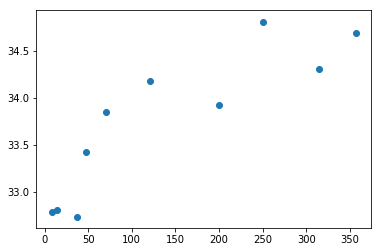

In [33]:
plt.scatter(distances,max_temps)

In [34]:
# 把距离按照从小到大进行排序，使用线性图来查看结果
df = DataFrame(data = {
    'temp':max_temps,
    'distance':distances
})

In [36]:
sort_df = df.sort_values('distance')

In [38]:
df

,distance,temp
0,47.0,33.43
1,357.0,34.69
2,121.0,34.18
3,250.0,34.81
4,8.0,32.79
5,315.0,34.31
6,71.0,33.85
7,200.0,33.92
8,14.0,32.81
9,37.0,32.74


In [37]:
sort_df

,distance,temp
4,8.0,32.79
8,14.0,32.81
9,37.0,32.74
0,47.0,33.43
6,71.0,33.85
2,121.0,34.18
7,200.0,33.92
3,250.0,34.81
5,315.0,34.31
1,357.0,34.69


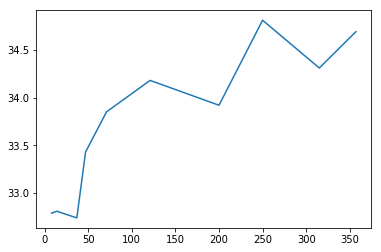

In [40]:
plt.plot(sort_df.distance,sort_df.temp)

观察发现，离海近的可以形成一条直线，离海远的也能形成一条直线。

首先使用numpy：把列表转换为numpy数组，用于后续计算。

分别以100公里和50公里为分界点，划分为离海近和离海远的两组数据

In [43]:
temps_np = np.array(max_temps)
dist_np = np.array(distances)

In [73]:
# 近海城市
near_dists = dist_np[dist_np<100]
near_temps = temps_np[dist_np<100]

# 远海城市
far_dists = dist_np[dist_np>50]
far_temps = temps_np[dist_np>50]

In [45]:
display(near_dists,near_temps)

array([47.,  8., 71., 14., 37.])

array([33.43, 32.79, 33.85, 32.81, 32.74])

In [47]:
display(far_dists,far_temps)

array([357., 121., 250., 315.,  71., 200.])

array([34.69, 34.18, 34.81, 34.31, 33.85, 33.92])

In [48]:
df

,distance,temp
0,47.0,33.43
1,357.0,34.69
2,121.0,34.18
3,250.0,34.81
4,8.0,32.79
5,315.0,34.31
6,71.0,33.85
7,200.0,33.92
8,14.0,32.81
9,37.0,32.74


使用支持向量机计算回归参数

In [ ]:
# 获取数据
# 选择模型
# 训练模型
# 预测数据

In [50]:
# 使用线性回归模型
from sklearn.linear_model import LinearRegression

In [74]:
# 构建算法模型
near = LinearRegression()
# 训练机器学习模型
# 训练【样本集】（自变量）必须是列向量
near.fit(near_dists.reshape(-1,1),near_temps)

# 获取预测数据
near_test = np.linspace(near_dists.min()-10,near_dists.max()+10,100).reshape(-1,1)
near_temps = near.predict(near_test)

In [75]:
far = LinearRegression()
far.fit(far_dists.reshape(-1,1),far_temps)
far_test = np.linspace(far_dists.min()-10,far_dists.max()+10,100).reshape(-1,1)
far_temps = far.predict(far_test)

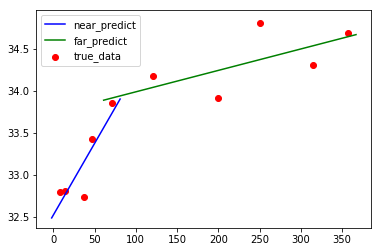

In [76]:
plt.plot(near_test,near_temps,color='blue',label='near_predict')
plt.plot(far_test,far_temps,color='green',label='far_predict')
plt.scatter(distances,max_temps,color='red',label='true_data')
plt.legend()

查看最低温度与海洋距离的关系

最低湿度与海洋距离的关系

最高湿度与海洋距离的关系

平均湿度与海洋距离的关系

思考：模仿最高温度，得到平均湿度与海洋距离的回归曲线

风向与风速的关系

在子图中，同时比较风向与湿度和风力的关系

由于风向是360度，我们可以考虑使用玫瑰图（极坐标条形图）

首先自定义一个画图函数

用numpy创建一个直方图，将360度划分为8个面元，将数据分类到这8个面元中

计算米兰各个方向上的风速

将各个方向的风速保存在列表中

画出各个方向的风速

将上面步骤写成函数